# SVM

#### 超平面
是一个空间的字空间，维度比所在的空间小一维，在二分类中，如果超平面可以将数据划分成两个集合，每个集合包含单独的类别，则称此超平面为决策边界。

决策边界向两边平移，碰到离决策边界最近的数据时停下来，此时的两个边界的距离称为**决策边界的边际(margin)，通常记为d**

拥有更大边际的决策边界在分类中的泛化误差更小

#### 损失函数
假设现在数据中总计有 $N$ 个训练样本，每个训练样本 $i$ 可以被表示为 $(x_i,y_i)(i=1,2,...,N)$ ，其中 $x_i$ 是 $(x_{1i},x_{2i},...,x_{ni})^T$ 这样的一个特征向量，每个样本总共含有 $n$ 个特征。 二分类标签 $y_i$ 的取值是{-1, 1}。

假设数据为二维，即 $x_i = (x_1,x_2)$，则决策边界就是一条直线，二维平面上一条直线可以表示为 $x_1 = ax_2+b$，将此表达式转换一下：

$$
0 = ax_2 - x_1 + b\\
0 = \left[\begin{matrix}a&-1\end{matrix}\right]\left[\begin{matrix}x_1\cr x_2\end{matrix}\right] + b \\
0 = \omega^Tx + b
$$

此时，在决策边界上任意取两个点 $x_a,x_b$，并带入决策边界的表达式则有：

$$
\omega^Tx_a + b = 0 \\
\omega^Tx_b + b = 0 \\
$$

两式相减得：

$$\omega^T(x_a - x_b) = 0 $$

一个列向量点乘另一个列向量，结果为零，表示两个向量垂直，其中我们知道 $x_a$ 和 $x_b$ 是决策边界上面的两个点，因此 $x_a - x_b$ 的方向是平行于决策边界的，所以参数向量 $\omega$ 的方向一定垂直于决策边界。

有了决策边界，假设两个虚线超平面到决策边界的距离为 k，则这两条线可表示为：

$$
\omega^Tx + b = k \\
\omega^Tx + b = -k \\
$$

两个表达式同时除以 k，并将其合并到 $\omega$ 和 $b$ 中，得到：

$$
\omega^Tx + b = 1 \\
\omega^Tx + b = -1 \\
$$

假设我们让两个虚线超平面过离决策边界最近的两类样本点，这些点被称为支持向量，假设为 $x_p$ 和 $x_r$ 是虚线超平面过的两类点，则有：


$$
\omega^Tx_p + b = 1 \\
\omega^Tx_r + b = -1 \\
$$

两式相减：

$$\omega^T(x_p - x_r) = 2 $$

则 $x_p-x_r$ 的方向相当于一个直角三角形的斜边，我们要求的是三角形的直角边，也就是 $\omega$ 的方向上的长度

向量 $\omega$ 的方向上的单位向量为：

$$\frac{\omega}{||\omega||}$$

让 $x_p-x_r$ 乘 $\omega$ 方向上的单位向量，就是 $x_p-x_r$ 在 $\omega$ 方向上的投影长度:

$$\frac{\omega(x_p-x_r)}{||\omega||} = \frac{2}{||\omega||}$$

等式左边就是 d：

$$d = \frac{2}{||\omega||}$$

得到了 d 的表达式，想求解 d 的最大值，转化为求解 $\frac{1}{d}$ 的最小值

对于两条虚线超平面，他们是数据边缘所在的点的位置，因此对于任意的数据点有：


$$
\begin{cases}
\omega^Tx_i + b \ge 1 &(y_i = 1)\\
\omega^Tx_i + b \le -1 &(y_i = -1)\\
\end{cases}
$$

将上面两个式子整合成为一个：
$$y_i (\omega^Tx_i + b) \ge 1$$

将上式作为条件，即可得到 SVM 最初的损失函数：

$$
\begin{cases}
\min\frac{2}{||\omega||}\\
s.t.y_i (\omega^Tx_i + b) \ge 1
\end{cases}
$$

带约束的优化问题，可以用拉格朗日乘数法来求解，构造拉格朗日函数：

$$L(\omega,b,\lambda) = \frac{1}{2}||\omega||^2 - \sum_{i=1}^{N}{\lambda(y_i (\omega^Tx_i + b) - 1)}$$
$$\min_{\omega,b}\max_{\lambda}L(\omega,b,\lambda)$$

**中间还差一大堆数学过程...研究明白了再补上**

### 求解过程可视化

In [1]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

### 线性数据
随机生成一组数据，画出分布图

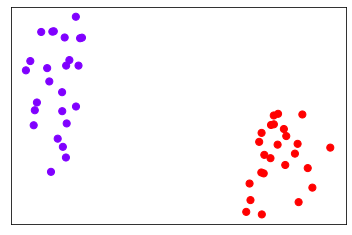

In [2]:
X,y = make_blobs(n_samples=50, centers=2, random_state=20, cluster_std=0.6)
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
plt.xticks([])
plt.yticks([])
plt.show()

获取子图

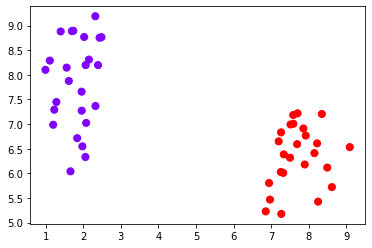

In [3]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
ax = plt.gca()

获取子图上的横纵坐标范围

In [4]:
xlim = ax.get_xlim()
ylim = ax.get_ylim()

In [5]:
xlim

(0.590289456153097, 9.492038760733655)

In [6]:
ylim

(4.975155802923461, 9.390892671304393)

在横纵坐标范围内均匀的取30个点

In [7]:
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)

In [8]:
axisx

array([0.59028946, 0.89724633, 1.2042032 , 1.51116007, 1.81811695,
       2.12507382, 2.43203069, 2.73898756, 3.04594444, 3.35290131,
       3.65985818, 3.96681505, 4.27377193, 4.5807288 , 4.88768567,
       5.19464254, 5.50159942, 5.80855629, 6.11551316, 6.42247004,
       6.72942691, 7.03638378, 7.34334065, 7.65029753, 7.9572544 ,
       8.26421127, 8.57116814, 8.87812502, 9.18508189, 9.49203876])

将生成的两个一维数据转换成为二维矩阵的格式，核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标

In [9]:
axisx, axisy = np.meshgrid(axisx, axisy)

这里面的 axisx 是30乘30的尺寸，表示着九百个点的横坐标

In [10]:
axisx.shape

(30, 30)

将九百个点的横纵左边组合起来，用到 vstack 函数，是降维用的，将一个或者多个结构一致的一维数组堆叠起来

In [11]:
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T

In [12]:
xy.shape

(900, 2)

画出来看看

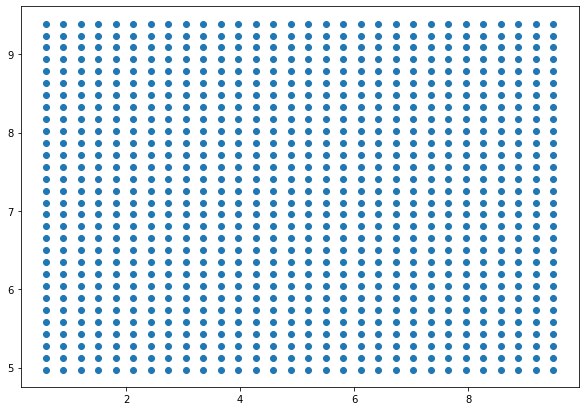

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(xy[:,0], xy[:,1], cmap='rainbow')
plt.show()

构建模型

fit 的本质就是在找决策边界

In [14]:
clf = SVC(kernel='linear').fit(X,y)
Z = clf.decision_function(xy).reshape(axisx.shape)

In [15]:
Z.shape

(30, 30)

(4.975155802923461, 9.390892671304393)

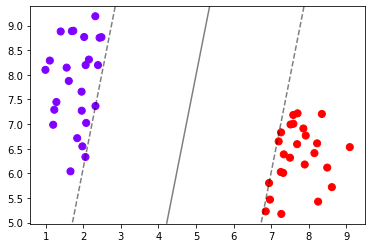

In [16]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
ax = plt.gca()
ax.contour(axisx, axisy, Z, colors='k', levels=[-1,0,1], linestyles=['--','-','--'], alpha=0.5)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

将绘图代码包装成为函数

In [17]:
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

使用函数来画图

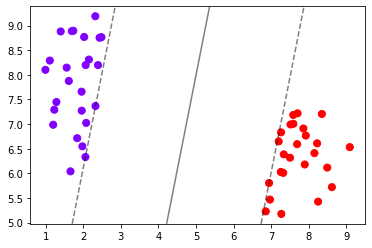

In [18]:
clf_ = SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf_)

#### 模型的方法
对样本进行分类

In [19]:
clf_.predict(X)

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0])

测试准确率

In [20]:
clf_.score(X,y)

1.0

支持向量

In [21]:
clf_.support_vectors_

array([[2.05867836, 6.33165541],
       [2.32629763, 7.36718593],
       [6.94118356, 5.80305102]])

看看这三个点在哪里,应该是在决策边界的两个虚线超平面上

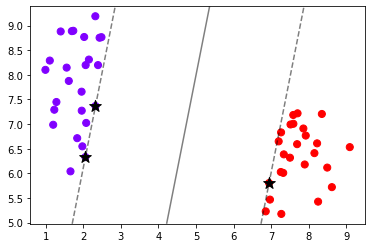

In [22]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
plt.scatter(clf_.support_vectors_[:,0], clf_.support_vectors_[:,1], c='black', s=150, marker='*')
plot_svc_decision_function(clf_)

每一类中支持向量的个数

In [23]:
clf_.n_support_

array([2, 1], dtype=int32)

### 非线性数据

In [24]:
from sklearn.datasets import make_circles

生成环状数据

In [25]:
X,y = make_circles(n_samples=100, factor=0.1, noise=0.1)

画出图来看一下

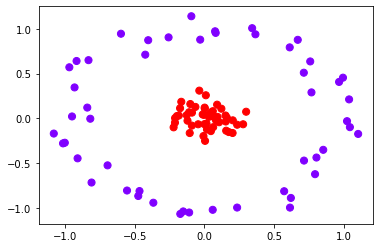

In [26]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
plt.show()

如果用线性核函数做划分

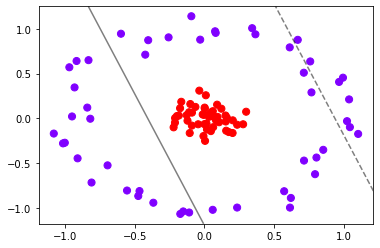

In [27]:
clf_ = SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf_)

明显效果不太好

In [28]:
clf_.score(X,y)

0.7

此时我们可以新创造一个维度，然后在三维空间中进行划分

定义新维度

In [29]:
r = np.exp(-(X**2)).sum(1)
rlim = np.linspace(min(r), max(r), 100)
rlim.shape

(100,)

画三维图像

In [30]:
from mpl_toolkits import mplot3d

定义一个画 3D 图像的方法

In [31]:
def plot_3d(elev=20, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0], X[:,1], r, c=y, s=50, cmap='rainbow')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    plt.show()

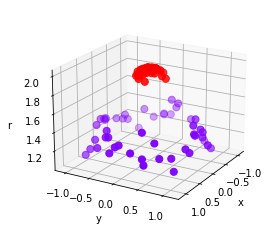

In [32]:
plot_3d()

可以看出，此时两组数据就是线性可分的了，可以在当中插入一个超平面将两个不同类别的数据分开

In [33]:
from ipywidgets import interact,fixed
interact(plot_3d,elev=(0,30),azip=(-180,180),X=fixed(X),y=fixed(y))
plt.show()

interactive(children=(IntSlider(value=20, description='elev', max=30), IntSlider(value=30, description='azim',…

**以上将数据升维到高维空间，直到数据变得线性可分为止的过程别称为核变换**，其中最重要的就是**核函数**

但是，当数据维度很高，计算量是巨大的，由此产生了核技巧，它是一种能够使用数据原始空间中的向量计算来表示升维后的空间中的点积结果的数学方式
- 有了核函数之后，就不用考虑映射函数，因为非线性SVM中的核函数都是正定核函数 (positive definite kernel functions)，都满足美世定律(Mercer's theorem)，确保了高维空间中任意两个向量的点积一定可以被低维空间中的这两个向量的某种计算来表示
- 计算简单快速
- 由于是在低维度计算，避免了维度诅咒

**参数**
- linear 线性核，解决线性问题，$K(x,y)=x^Ty$
- poly 多项式核，解决偏线性问题，$K(x,y)=(\gamma(x\cdot y)+r)^d$
- sigmoid 双曲正切核，解决非线性问题，$K(x,y)=tanh(\gamma(x\cdot y)+r)$
- rbf 高斯径向核，解决偏非线性问题，$K(x,y)=e^{-\gamma||x-y||^2},\gamma > 0$


将刚才的环形数据采用 rbf 试一试

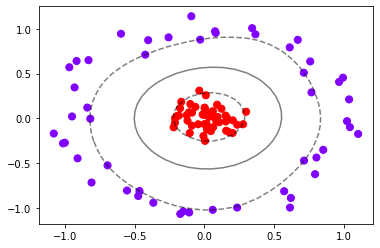

In [34]:
clf_ = SVC(kernel='rbf').fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf_)

可以看出来高斯径向基核函数表现优异